# Analysis on risk of Aircraft

## Overview

This work is a first attemp trying to determine the risks associated with aircrafts using caggle Aviation dataset that includes aviation accident data from 1962 to 2023.

## Business Understanding

- A company wants to purchase and operate airplanes for commercial and private enterprises.
-  As data scientists, We are charged to find the aircraft with the lowest risk for the company using caggle Aviation dataset that includes aviation accident data from 1962 to 2023.
- We will clean the data and then make analysis to propose potential solutions.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Understanding

In [67]:
# importing the data with a glampse on the top 5 rows.
df = pd.read_csv('Data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

The first thing we see while looking at the top 5 rows of our dataset is that the columns name are not properly writen, let's fix that.

In [68]:
# Replacing "." in the name with a space.
df.columns = df.columns.str.replace("."," ")
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Let's see our dataset information, that will allow us to answer to the questions:
-  What are all of our columns label?
-  What is the size of the dataset?
-  Do we have missing values?

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      90348 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

Before saying that we have 90348 records in our dataset, let us check for duplicated values.

In [70]:
# Checking for duplicated values
df.duplicated().sum()

1390

We have 1390 duplicated values, let us remove them.

In [71]:
# Remove duplicates and validation
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88889 non-null  object 
 1   Investigation Type      88958 non-null  object 
 2   Accident Number         88889 non-null  object 
 3   Event Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport Code            50249 non-null  object 
 9   Airport Name            52790 non-null  object 
 10  Injury Severity         87889 non-null  object 
 11  Aircraft damage         85695 non-null  object 
 12  Aircraft Category       32287 non-null  object 
 13  Registration Number     87572 non-null  object 
 14  Make                    88826 non-null

Now we can say that we have 88958 distinct records, 30 columns with several missing values.  Let's see them by column name.

In [73]:
# missing values by column name
df.isna().sum() #/df.isna().count())*100


Event Id                     69
Investigation Type            0
Accident Number              69
Event Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport Code              38709
Airport Name              36168
Injury Severity            1069
Aircraft damage            3263
Aircraft Category         56671
Registration Number        1386
Make                        132
Model                       161
Amateur Built               171
Number of Engines          6153
Engine Type                7146
FAR Description           56935
Schedule                  76376
Purpose of flight          6261
Air carrier               72310
Total Fatal Injuries      11470
Total Serious Injuries    12579
Total Minor Injuries      12002
Total Uninjured            5981
Weather Condition          4561
Broad phase of flight     27234
Report Status              6450
Publication Date          15299
dtype: i

We are already noticing big problems here, we have variable with 60% to 85% of missing values, which is a lot by variable. lets us treat them separately, starting with the leading variable Aircraft Category.

 64% of data of Aircraft Category column are missing, as it is a decisive variable, let's us see it's values

In [74]:
df['Aircraft Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft Category, dtype: int64

As there is an 'Unknown' Category, let's fusion the NaNs with this category, as they are also unknown.

In [75]:
# Replacing all NaN values in Aircraft.Category with 'Null Category'
df['Aircraft Category'].fillna('Unknown',inplace=True)
df['Aircraft Category'].value_counts()


Unknown              56685
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft Category, dtype: int64

Now, let us drop all the rows with less than 1% of missing data by column, but before let us take a look at the Make column

In [76]:
df['Make'].value_counts()[:20]

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
Bell                  2134
Boeing                1594
BOEING                1151
Grumman               1094
Mooney                1092
BEECH                 1042
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
BELL                   588
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Name: Make, dtype: int64

We see some incoherences in the formating, Let'us fix it.

In [77]:
df['Make'] = df['Make'].str.title()

In [78]:
df.dropna(axis =0, subset= ['Event Id','Location','Country','Accident Number','Event Date','Make','Model','Amateur Built'], inplace=True)

In [79]:
df.isna().sum()  #/df.isna().count())*100

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                      0
Country                       0
Latitude                  54094
Longitude                 54103
Airport Code              38271
Airport Name              35751
Injury Severity             979
Aircraft damage            3134
Aircraft Category             0
Registration Number        1185
Make                          0
Model                         0
Amateur Built                 0
Number of Engines          5913
Engine Type                6921
FAR Description           56509
Schedule                  76060
Purpose of flight          6060
Air carrier               71856
Total Fatal Injuries      11299
Total Serious Injuries    12378
Total Minor Injuries      11797
Total Uninjured            5813
Weather Condition          4375
Broad phase of flight     26970
Report Status              6335
Publication Date          15145
dtype: i

Also, let's us drop the columns with too many NaNs, more than 60%

In [80]:
#  Drop the columns with more than 60% NaNs
df.drop(['Schedule','Air carrier','FAR Description','Latitude','Longitude'],axis =1, inplace =True)

Now let's us drop columns that won't serve this analysis as Airport code or Airport Name or Registration Number Columns.

In [81]:
df.drop(['Airport Code','Airport Name','Registration Number','Publication Date'],axis =1, inplace =True)

In [82]:
(df.isna().sum()/df.isna().count())*100

Event Id                   0.000000
Investigation Type         0.000000
Accident Number            0.000000
Event Date                 0.000000
Location                   0.000000
Country                    0.000000
Injury Severity            1.107391
Aircraft damage            3.545008
Aircraft Category          0.000000
Make                       0.000000
Model                      0.000000
Amateur Built              0.000000
Number of Engines          6.688460
Engine Type                7.828654
Purpose of flight          6.854738
Total Fatal Injuries      12.780807
Total Serious Injuries    14.001312
Total Minor Injuries      13.344117
Total Uninjured            6.575346
Weather Condition          4.948759
Broad phase of flight     30.506979
Report Status              7.165803
dtype: float64

Things are starting to look great, let us treat the remaining columns with missing values individually. As we don't want to modify in a certain way the data, if one of the column category is 'Unknown' or 'Unavailable', we will merge the NaNs with the value of this column. 

In [83]:
df['Injury Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(29)',
       'Fatal(70)', 'Fatal(9)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(270)', 'Fatal(144)', 'Fatal(174)',
       'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)', 'Fatal(27)',
       'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)', 'Fatal(47)',
       'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

As there is an 'Unavailable' label, let's us fill the NaNs with that too as both categories look the same for us in our analysis.

In [84]:
df['Injury Severity'].fillna('Unavailable',inplace=True)

In [85]:
# Aircraft Damage values
df['Aircraft damage'].value_counts()

Substantial    63944
Destroyed      18459
Minor           2750
Unknown          119
Name: Aircraft damage, dtype: int64

In [86]:
# Fill Aircraft Damage 3263 null values
df['Aircraft damage'].fillna('Unknown',inplace=True)

In [87]:
df['Number of Engines'].value_counts(normalize = True)

1.0    0.841017
2.0    0.133223
0.0    0.014789
3.0    0.005770
4.0    0.005152
8.0    0.000036
6.0    0.000012
Name: Number of Engines, dtype: float64

In [88]:
df['Number of Engines'].median()

1.0

In [89]:
df['Number of Engines'].fillna(df['Number of Engines'].median(), inplace=True)

In [90]:
df['Number of Engines'].value_counts()

1.0    75291
2.0    10990
0.0     1220
3.0      476
4.0      425
8.0        3
6.0        1
Name: Number of Engines, dtype: int64

In [91]:
df['Engine Type'].value_counts(normalize = True)

Reciprocating      0.851236
Turbo Shaft        0.043186
Turbo Prop         0.041455
Turbo Fan          0.030214
Unknown            0.024728
Turbo Jet          0.008603
None               0.000233
Geared Turbofan    0.000147
Electric           0.000123
LR                 0.000025
NONE               0.000025
UNK                0.000012
Hybrid Rocket      0.000012
Name: Engine Type, dtype: float64

In [92]:
df['Engine Type'].fillna('Unknown',inplace=True)

In [93]:
df['Purpose of flight'].value_counts(normalize = True)

Personal                     0.599094
Instructional                0.128507
Unknown                      0.080878
Aerial Application           0.057198
Business                     0.048576
Positioning                  0.019746
Other Work Use               0.015289
Ferry                        0.009764
Aerial Observation           0.009533
Public Aircraft              0.008719
Executive/corporate          0.006631
Flight Test                  0.004894
Skydiving                    0.002210
External Load                0.001494
Public Aircraft - Federal    0.001263
Banner Tow                   0.001227
Air Race show                0.001202
Public Aircraft - Local      0.000899
Public Aircraft - State      0.000765
Air Race/show                0.000716
Glider Tow                   0.000644
Firefighting                 0.000486
Air Drop                     0.000134
ASHO                         0.000073
PUBS                         0.000049
PUBL                         0.000012
Name: Purpos

In [94]:
df['Purpose of flight'].fillna('Unknown',inplace=True)

In [95]:
df['Total Fatal Injuries'].fillna(df['Total Fatal Injuries'].median(), inplace=True)

In [96]:
df['Total Minor Injuries'].fillna(df['Total Minor Injuries'].median(), inplace=True)

In [97]:
df['Total Serious Injuries'].fillna(df['Total Serious Injuries'].median(), inplace=True)

In [98]:
df['Total Uninjured'].fillna(df['Total Uninjured'].median(), inplace=True)

In [99]:
df['Weather Condition'].value_counts() #(normalize = True) #fillna('Unknown',inplace=True)

VMC    76999
IMC     5947
UNK      823
Unk      262
Name: Weather Condition, dtype: int64

In [100]:
df['Weather Condition'] = df['Weather Condition'].str.upper()

In [101]:
df['Weather Condition'].value_counts()

VMC    76999
IMC     5947
UNK     1085
Name: Weather Condition, dtype: int64

In [102]:
df['Weather Condition'].mode()

0    VMC
dtype: object

In [103]:
df['Weather Condition'].fillna('VMC', inplace=True)

In [104]:
df['Broad phase of flight'].value_counts(normalize = True) #'Broad phase of flight'

Landing        0.250374
Takeoff        0.202406
Cruise         0.166124
Maneuvering    0.132056
Approach       0.106078
Climb          0.032847
Taxi           0.031740
Descent        0.030503
Go-around      0.021990
Standing       0.015203
Unknown        0.008741
Other          0.001937
Name: Broad phase of flight, dtype: float64

In [105]:
df['Broad phase of flight'].fillna('Unknown',inplace=True)

In [106]:
df['Report Status'].mode()

0    Probable Cause
dtype: object

In [107]:
df['Report Status'].fillna('Probable Cause', inplace=True)

In [108]:
df.isna().sum()

Event Id                  0
Investigation Type        0
Accident Number           0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft damage           0
Aircraft Category         0
Make                      0
Model                     0
Amateur Built             0
Number of Engines         0
Engine Type               0
Purpose of flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
Broad phase of flight     0
Report Status             0
dtype: int64

We have handled all of our missing data. let's see how many rows per column we have left

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88406 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event Id                88406 non-null  object 
 1   Investigation Type      88406 non-null  object 
 2   Accident Number         88406 non-null  object 
 3   Event Date              88406 non-null  object 
 4   Location                88406 non-null  object 
 5   Country                 88406 non-null  object 
 6   Injury Severity         88406 non-null  object 
 7   Aircraft damage         88406 non-null  object 
 8   Aircraft Category       88406 non-null  object 
 9   Make                    88406 non-null  object 
 10  Model                   88406 non-null  object 
 11  Amateur Built           88406 non-null  object 
 12  Number of Engines       88406 non-null  float64
 13  Engine Type             88406 non-null  object 
 14  Purpose of flight       88406 non-null

We had 88958 distinct rows and after cleaning missing data, we have 88406 remaining rows per columns, we only removed 552 rows and 9 irrelevant columns to us to clean our data, which is good. Let's move on.

## Exploratory and Analysis 

Let's see some indicators for our numerical variables

In [119]:
df.describe()

,Number of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,88406.000000,88406.000000,88406.000000,88406.000000,88406.000000
mean,1.135998,0.558152,0.239712,0.308791,5.011990
std,0.431704,5.090423,1.429433,2.087133,26.913973
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We have 4 numerical variables, lets us see them by different categories

In [120]:
ACI_TFI = df.groupby('Aircraft Category',sort=True).sum()['Total Fatal Injuries'].sort_values(ascending = False).index
ACV_TFI = df.groupby('Aircraft Category',sort=True).sum()['Total Fatal Injuries'].sort_values(ascending = False).values

[]

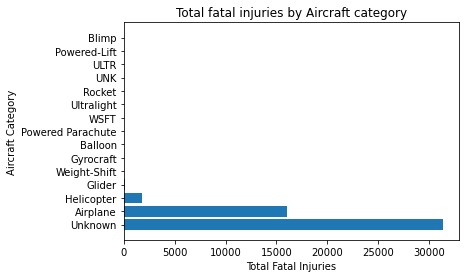

In [121]:
fig, ax = plt.subplots()
ax.barh(ACI_TFI,ACV_TFI)
ax.set_title('Total fatal injuries by Aircraft category')
ax.set_xlabel('Total Fatal Injuries')
ax.set_ylabel('Aircraft Category')

plt.plot()

In [122]:
ACI_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Serious Injuries'].sort_values(ascending = False).index
ACV_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Serious Injuries'].sort_values(ascending = False).values

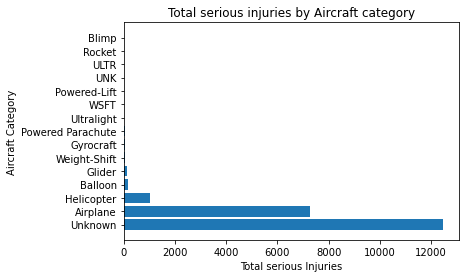

In [123]:
fig, ax = plt.subplots()
ax.barh(ACI_TSI,ACV_TSI)
ax.set_title('Total serious injuries by Aircraft category')
ax.set_xlabel('Total serious Injuries')
ax.set_ylabel('Aircraft Category')

plt.plot();

In [124]:
ACI_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Minor Injuries'].sort_values(ascending = False).index
ACV_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Minor Injuries'].sort_values(ascending = False).values

[]

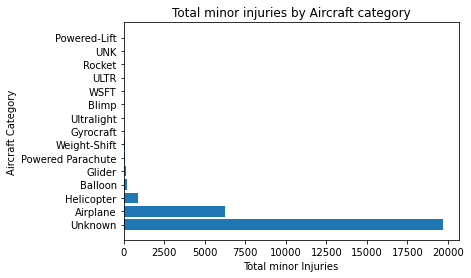

In [125]:
fig, ax = plt.subplots()
ax.barh(ACI_TSI,ACV_TSI)
ax.set_title('Total minor injuries by Aircraft category')
ax.set_xlabel('Total minor Injuries')
ax.set_ylabel('Aircraft Category')

plt.plot()

In [126]:
ACI_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Uninjured'].sort_values(ascending = False).index
ACV_TSI = df.groupby('Aircraft Category',sort=True).sum()['Total Uninjured'].sort_values(ascending = False).values
df.groupby('Aircraft Category').sum()

,Number of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
Aircraft Category,,,,,
Airplane,31478.0,15991.0,7253.0,6276.0,170487.0
Balloon,106.0,43.0,186.0,185.0,844.0
Blimp,6.0,0.0,0.0,3.0,5.0
Glider,162.0,99.0,113.0,112.0,367.0
Gyrocraft,173.0,44.0,55.0,30.0,90.0
Helicopter,3662.0,1754.0,1034.0,888.0,3994.0
Powered Parachute,91.0,15.0,40.0,73.0,23.0
Powered-Lift,7.0,0.0,1.0,0.0,4.0
Rocket,1.0,1.0,0.0,1.0,0.0


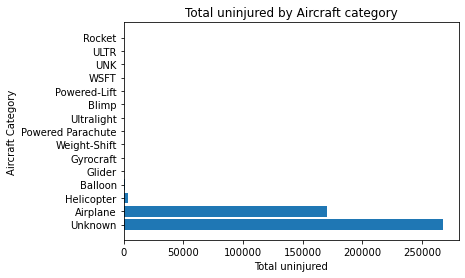

In [127]:
fig, ax = plt.subplots()
ax.barh(ACI_TSI,ACV_TSI)
ax.set_title('Total uninjured by Aircraft category')
ax.set_xlabel('Total uninjured')
ax.set_ylabel('Aircraft Category')

plt.plot();

In [128]:
df.groupby(['Aircraft Category','Investigation Type']).sum()

Number of Engines  Total Fatal Injuries  \
Aircraft Category Investigation Type                                            
Airplane          Accident                      28984.0               15989.0   
                  Incident                       2494.0                   2.0   
Balloon           Accident                        105.0                  43.0   
                  Incident                          1.0                   0.0   
Blimp             Accident                          6.0                   0.0   
Glider            Accident                        162.0                  99.0   
Gyrocraft         Accident                        173.0                  44.0   
Helicopter        Accident                       3546.0                1754.0   
                  Incident                        116.0                   0.0   
Powered Parachute Accident                         91.0                  15.0   
Powered-Lift      Accident                          3.0                   0.0   
                  Incident                          4.0                   0.0   
Rocket            Accident                          1.0                   1.0   
ULTR              Accident                          1.0                   0.0   
UNK               Accident                          2.0                   0.0   
Ultralight        Accident                         31.0                  10.0   
Unknown           Accident                      60595.0               31290.0   
                  Incident                       3945.0                  20.0   
WSFT              Accident                          9.0                  10.0   
Weight-Shift      Accident                        160.0                  67.0   

                                      Total Serious Injuries  \
Aircraft Category Investigation Type                           
Airplane          Accident                            6980.0   
                  Incident                             273.0   
Balloon           Accident                             185.0   
                  Incident                               1.0   
Blimp             Accident                               0.0   
Glider            Accident                             113.0   
Gyrocraft         Accident                              55.0   
Helicopter        Accident                            1031.0   
                  Incident                               3.0   
Powered Parachute Accident                              40.0   
Powered-Lift      Accident                               1.0   
                  Incident                               0.0   
Rocket            Accident                               0.0   
ULTR              Accident                               0.0   
UNK               Accident                               0.0   
Ultralight        Accident                              11.0   
Unknown           Accident                           12411.0   
                  Incident                              29.0   
WSFT              Accident                               1.0   
Weight-Shift      Accident                              58.0   

                                      Total Minor Injuries  Total Uninjured  
Aircraft Category Investigation Type                                         
Airplane          Accident                          5818.0         105675.0  
                  Incident                           458.0          64812.0  
Balloon           Accident                           185.0            836.0  
                  Incident                             0.0              8.0  
Blimp             Accident                             3.0              5.0  
Glider            Accident                           112.0            367.0  
Gyrocraft         Accident                            30.0             90.0  
Helicopter        Accident                           888.0           3672.0  
                  Incident                             0.0        

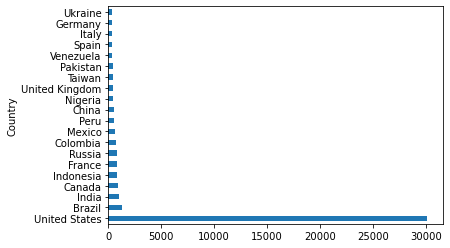

In [129]:
df.groupby('Country').sum()['Total Fatal Injuries'].sort_values(ascending =False)[:20].plot(kind='barh');

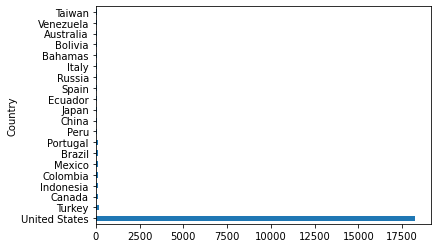

In [130]:
df.groupby('Country').sum()['Total Serious Injuries'].sort_values(ascending =False)[:20].plot(kind = 'barh');

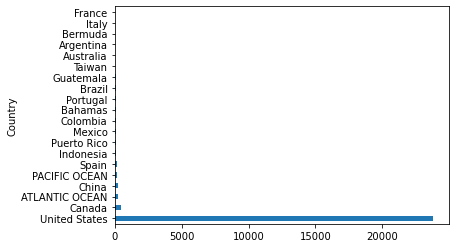

In [131]:
df.groupby('Country').sum()['Total Minor Injuries'].sort_values(ascending =False)[:20].plot(kind = 'barh');

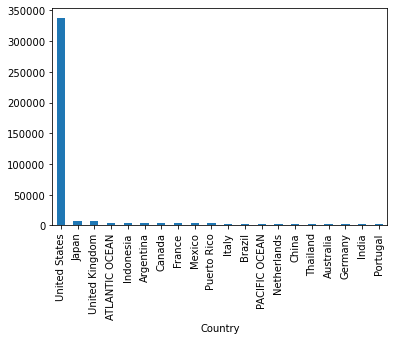

In [132]:
df.groupby('Country').sum()['Total Uninjured'].sort_values(ascending =False)[:20].plot(kind ='bar');

hipnlkl

In [133]:
df.groupby(['Aircraft Category','Aircraft damage']).sum()['Total Fatal Injuries'].sort_values(ascending=False)

Aircraft Category  Aircraft damage
Unknown            Destroyed          27387.0
Airplane           Destroyed          11483.0
                   Substantial         4183.0
Unknown            Substantial         2770.0
                   Unknown             1046.0
Helicopter         Destroyed           1020.0
                   Substantial          697.0
Airplane           Minor                176.0
                   Unknown              149.0
Unknown            Minor                107.0
Glider             Substantial           76.0
Weight-Shift       Substantial           57.0
Helicopter         Unknown               34.0
Balloon            Destroyed             28.0
Gyrocraft          Substantial           23.0
                   Destroyed             21.0
Glider             Destroyed             21.0
Powered Parachute  Substantial           11.0
Weight-Shift       Destroyed             10.0
Balloon            Substantial           10.0
Ultralight         Substantial            8.0

In [134]:
df.groupby(['Aircraft Category','Make']).sum()['Total Fatal Injuries'].sort_values(ascending=False)[:20]

Aircraft Category  Make             
Unknown            Cessna               6532.0
                   Boeing               5155.0
                   Piper                4766.0
Airplane           Boeing               3278.0
                   Cessna               3049.0
Unknown            Beech                2574.0
Airplane           Piper                1882.0
                   Airbus               1316.0
                   Beech                1192.0
Unknown            Mcdonnell Douglas    1185.0
                   Douglas               917.0
                   Airbus Industrie      822.0
                   Bell                  733.0
Helicopter         Bell                  552.0
Unknown            Mooney                474.0
                   Tupolev               420.0
Airplane           Airbus Industrie      352.0
Helicopter         Robinson              329.0
Airplane           Embraer               319.0
Unknown            Robinson              286.0
Name: Total Fatal Injur

In [135]:
df.groupby(['Aircraft Category','Amateur Built']).sum()['Total Fatal Injuries'].sort_values(ascending=False)[:20]

Aircraft Category  Amateur Built
Unknown            No               29299.0
Airplane           No               14972.0
Unknown            Yes               2011.0
Helicopter         No                1709.0
Airplane           Yes               1019.0
Glider             No                  90.0
Weight-Shift       No                  58.0
Helicopter         Yes                 45.0
Balloon            No                  41.0
Gyrocraft          Yes                 37.0
Powered Parachute  No                  14.0
WSFT               No                  10.0
Glider             Yes                  9.0
Weight-Shift       Yes                  9.0
Ultralight         No                   8.0
Gyrocraft          No                   7.0
Balloon            Yes                  2.0
Ultralight         Yes                  2.0
Powered Parachute  Yes                  1.0
Rocket             No                   1.0
Name: Total Fatal Injuries, dtype: float64

In [136]:
df.groupby(['Aircraft Category','Weather Condition']).mean()['Total Fatal Injuries']

Aircraft Category  Weather Condition
Airplane           IMC                  2.014245
                   UNK                  1.643799
                   VMC                  0.486669
Balloon            IMC                  6.000000
                   UNK                  0.000000
                   VMC                  0.110132
Blimp              VMC                  0.000000
Glider             IMC                  0.500000
                   UNK                  0.666667
                   VMC                  0.190855
Gyrocraft          IMC                  0.000000
                   VMC                  0.257310
Helicopter         IMC                  1.893805
                   UNK                  2.042553
                   VMC                  0.442131
Powered Parachute  VMC                  0.164835
Powered-Lift       VMC                  0.000000
Rocket             VMC                  1.000000
ULTR               VMC                  0.000000
UNK                VMC          

In order to analyze our data better, let us export it and continue with Power BI

In [137]:
df.to_csv('Aviation_treated2.csv')